In [7]:
import dask.dataframe as dd

In [8]:
df= dd.read_csv("covid-data-cleaned.csv")
df.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,human_development_index,population
0,0,AFG,Asia,afghanistan,29/03/2020 00:00,91.0,67.0,2.0,2.0,2.243,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.511,41128772
1,1,AFG,Asia,afghanistan,30/03/2020 00:00,91.0,0.0,2.0,0.0,2.243,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.511,41128772
2,2,AFG,Asia,afghanistan,31/03/2020 00:00,91.0,0.0,2.0,0.0,2.243,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.511,41128772
3,3,AFG,Asia,afghanistan,01/04/2020 00:00,91.0,0.0,2.0,0.0,2.243,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.511,41128772
4,4,AFG,Asia,afghanistan,02/04/2020 00:00,91.0,0.0,2.0,0.0,2.243,...,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,0.511,41128772


In [9]:
import matplotlib.pyplot as plt

In [13]:
df['date'] = dd.to_datetime(df['date'])

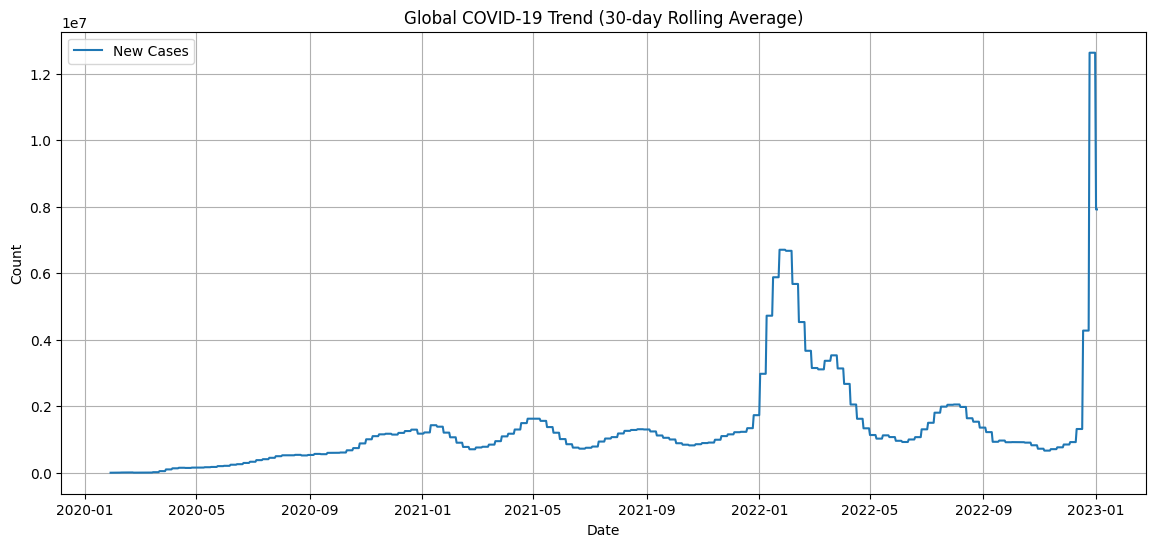

In [16]:
global_daily = df.groupby('date')['new_cases'].sum().compute()
global_daily = global_daily.rolling(window=7).mean() 
plt.figure(figsize=(14,6))
plt.plot(global_daily.index, global_daily, label='New Cases')
plt.title("Global COVID-19 Trend (30-day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
latest_date = df['date'].max().compute()
latest = df[df['date'] == latest_date][['location', 'total_cases', 'population']].compute()
latest = latest.dropna()

latest['cases_per_million'] = (latest['total_cases'] / latest['population']) * 1e6

In [18]:
print("Top 10 by Cases per Million")
print(latest.sort_values(by='cases_per_million', ascending=False).head(10))

Top 10 by Cases per Million
           location  total_cases  population  cases_per_million
43631        cyprus     631111.0      896007      704359.452549
141974   san marino      23177.0       33690      687948.946275
9913        austria    5705073.0     8939617      638178.682599
150968     slovenia    1308501.0     2119843      617263.165244
24567        brunei     270199.0      449002      601776.829502
4057        andorra      47751.0       79843      598061.195095
46690       denmark    3389605.0     5882259      576242.052586
98793    luxembourg     366240.0      647601      565533.407144
60059        france   38141254.0    67813000      562447.524811
154370  south korea   29116800.0    51815808      561928.900153


In [19]:
import seaborn as sns

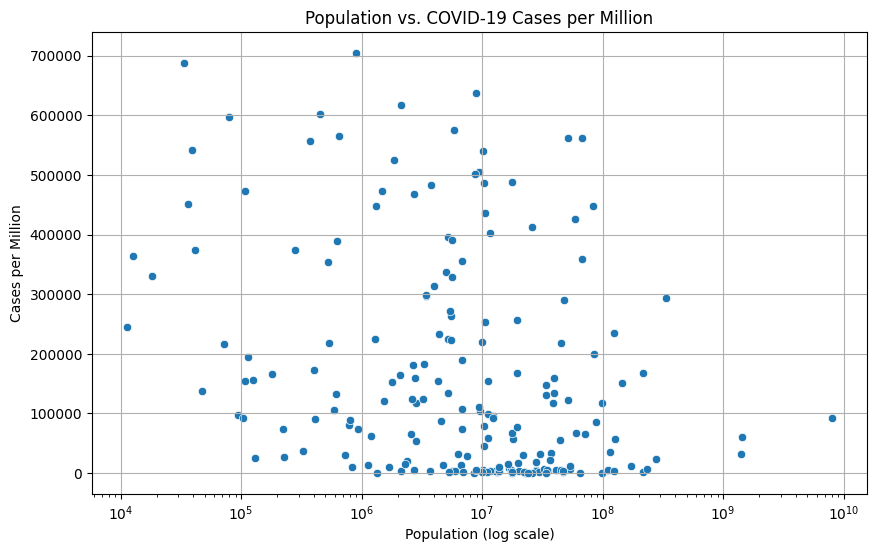

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=latest, x='population', y='cases_per_million')
plt.xscale('log')
plt.title("Population vs. COVID-19 Cases per Million")
plt.xlabel("Population (log scale)")
plt.ylabel("Cases per Million")
plt.grid(True)
plt.show()

In [27]:
avg_by_country = df.groupby('location')[[
    'stringency_index',
    'people_fully_vaccinated',
    'total_cases',
    'population'
]].mean().compute()

avg_by_country = avg_by_country.dropna()
avg_by_country['cases_per_million'] = (avg_by_country['total_cases'] / avg_by_country['population']) * 1e6


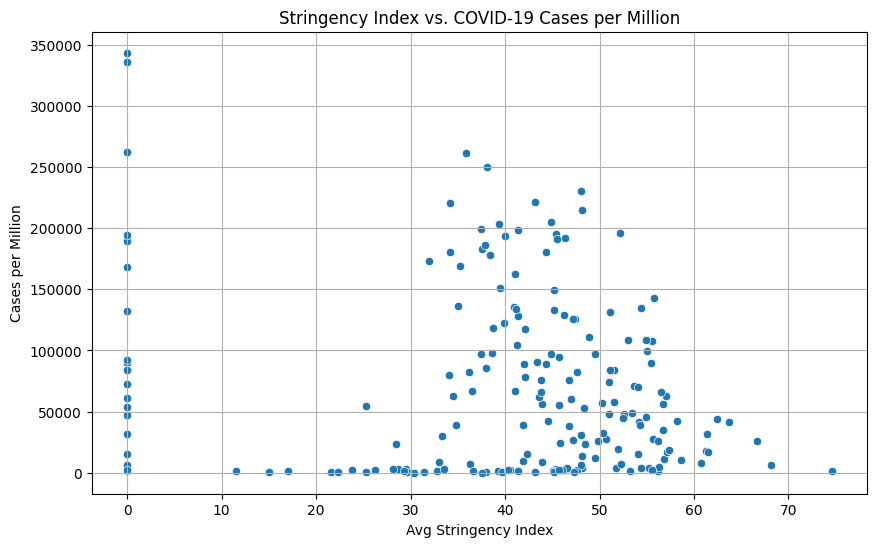

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=avg_by_country, x='stringency_index', y='cases_per_million')
plt.title("Stringency Index vs. COVID-19 Cases per Million")
plt.xlabel("Avg Stringency Index")
plt.ylabel("Cases per Million")
plt.grid(True)
plt.show()